## Mesothelial cell evolution in PDAC stroma

The infiltration of cells of mesothelial lineages at the tumor invasive front are associated with poor outcomes in adenocarcinomas including PDAC (Shiraishi, Takehiro, et al., 2020;Shimizu, Atsushi, et al., 2012 ). In parallel, we observed the over-representation of mesothelial markers in the MUC16 expressing bulk RNA seq samples of TCGA-PAAD cohort annotated using Descartes transcriptional signatures (Figure 1). To ascertain the contributions of mesothelial cells, we used scRNA data of fibroblast-enriched stroma of KPC mice and identified that a small fraction of cells (2%; 158/8524 cells) are MUC16 expressing mesothelial cells. Furthermore, clustering analysis of stromal cells exhibit the presence of distinct populations of myeloid/-like (CD14 expressing), SMC/endothelial cells alongside mesothelial cells.  Around ~50 % (3370/8524 cells) of the stromal cells expressed MSLN without any clear commitment towards myeloid, mesothelial or endothelial fractions. Moreover, MSLN expressing cells also variably expressed other mesothelial markers (Upk1b, Upk3b, Wt1) suggestive of possible lineage evolution from mesothelial cells. In addition, a considerable fraction (~20%; 800/3370 cells) of Msln expressing cells are epitheloid cells coexpressing cytokeratins (Krt7, Krt19), epithelial (Cdh1, Epcam, Elf3) and myeloid markers (Cd14, Spp1, Kcnn4) and are transcriptionally distinct from other Msln expressing cells. Cell trajectory analysis with merely Msln expressing cells exhibit that evolution of mesothelial cells to epitheloid cells with respect to pseudotime involves a intermediate state of smooth muscle/myoepithelial like cells. The cell states exhibiting gradual loss and gain in the expression of mesothelial and myeloid markers across the clusters are recapitulated in the heatmap (Figure). We observed that the transition involving the gradual loss of mesothelial markers (Muc16, Upk3b, Upk1b) correlated (rho < -0.4 & p < 0.0001) with the gradual gain in expression of genes of ribosomal subunits (Rps27a,Rpl23a, Rpl17), osteopontin signaling (Spp1, Cd44) and Cdkn2a. Where as MUC1 expressing cells spanned across the clusters (C5, C7, C1 & C10) show multiple sub-populations of proliferation and differentiating subsets. Majority of the Muc1 expressing cells show coexpression of myeloid (Cd14, Kcnn4) and epithelial markers (Cdh1) with concomittant downregulation of mesenchymal/SMC markers (Cald1, Vim, Sparc). Moreover, Muc1 cells express markers of stratified epithelium (Agr2, Elf3, "Ripk4") and glycolytic genes (Hk2, Elf3) with increasing pseudotime. 




Shiraishi, Takehiro, et al. "Prognostic significance of mesothelin expression in colorectal cancer disclosed by area-specific four-point tissue microarrays." Virchows Archiv 477.3 (2020): 409-420.


In [169]:
##analyzing elyada et al dataset (GSE129455)

library(Seurat)
library(rhdf5)
library(monocle3)
library(SeuratWrappers)
library(pheatmap)
library(RColorBrewer)

In [170]:
##analyzing elyada et al dataset
a = read.csv("~/Documents/fibroblast_annotated.csv", header =T, stringsAsFactors = F, check.names = F)
names = a[,1]

a = a[, -1]
a = as.matrix(a)
a = apply(a, 2, as.numeric)
rownames(a) = names


In [171]:
pbmc = CreateSeuratObject(as.data.frame(a))
mice = gsub(".+-", "", colnames(a))
pbmc$orig.ident = mice
print(pbmc)
pb = pbmc
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))
### considering first 20 PCs
pbmc <- FindNeighbors(pbmc, dims = 1:50)
pbmc <- FindClusters(pbmc, resolution = 0.5)

An object of class Seurat 
14330 features across 8524 samples within 1 assay 
Active assay: RNA (14330 features, 0 variable features)


Centering and scaling data matrix

PC_ 1 
Positive:  Krt8, Krt18, Cdkn2a, Pkm, Spp1, Tpd52, Gapdh, Tm4sf1, Pfdn1, S100a6 
	   Ccnd1, Cd9, Cystm1, Hmga1b, Tes, Prkg2, Pgam1, Msn, Tspan8, Gsr 
	   Ezr, Mif, Tpi1, Gsto1, Cav2, Eno1, Cpe, Mgst3, Kcnn4, Lgals3 
Negative:  Serping1, Col3a1, Col1a2, Dcn, C1s1, Cd302, Col1a1, Loxl1, Rarres2, Ccdc80 
	   Bgn, Mfap5, Adamts2, C1ra, Fstl1, Lum, Serpinf1, C3, Fxyd1, Mfap2 
	   Mmp23, Gpx3, Col5a2, Il11ra1, Rcn3, Aebp1, Fbn1, Fcgrt, Dpt, Lhfp 
PC_ 2 
Positive:  Rgs5, Higd1b, Cox4i2, Ndufa4l2, Gm13889, Septin4, Gja4, Gucy1b1, Emid1, Mcam 
	   Ppp1r14a, Notch3, Esam, Des, Ednrb, Sparcl1, Abcc9, Myl9, Pdgfrb, Ptp4a3 
	   Gjc1, Vstm4, Rgs4, Adap2os, Serpine2, Kcnj8, Rasgrp2, Apold1, Gng11, Acta2 
Negative:  Fth1, Ndufa4, S100a10, Efemp1, Clu, Ugdh, C3, S100a16, Ly6a, Ctsl 
	   Scara3, Igfbp4, Clec3b, Mgst1, Ly6c1, Fbln2, Mt2, Cfb, Tnxb, Dpt 
	   C4b, S100a1, Mt1, Vegfd, Gda, Ly6e, Plpp3, Gstm1, Ifi205, Ogn 
PC_ 3 
Positive:  Gsta4, Spint2, Muc1, Fxyd3,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8524
Number of edges: 301958

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9263
Number of communities: 17
Elapsed time: 0 seconds


In [172]:
### calculating the proportion of cells for each mice

sc = pbmc@assays$RNA@scale.data
ct2 = table(pbmc$orig.ident)
mat = matrix(0, length(genes), 4)
colnames(mat) = unique(pbmc$orig.ident)
rownames(mat) = genes
for(i in 1:length(genes)){
  ct = which(as.numeric(sc[genes[i], ]) > summary(as.numeric(sc[genes[i], ]))[5])
  ct = table(pbmc$orig.ident[ct])
  c11 = sort(ct/ct2[names(ct)])
  mat[i, names(c11)] = as.numeric(c11)}

In [173]:
    pbmc = RunUMAP(pbmc, dims = 1:35)


19:04:07 UMAP embedding parameters a = 0.9922 b = 1.112

19:04:07 Read 8524 rows and found 35 numeric columns

19:04:07 Using Annoy for neighbor search, n_neighbors = 30

19:04:07 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:04:08 Writing NN index file to temp file /tmp/Rtmp4kWXqY/filef8c263cc47

19:04:08 Searching Annoy index using 1 thread, search_k = 3000

19:04:10 Annoy recall = 100%

19:04:10 Commencing smooth kNN distance calibration using 1 thread

19:04:11 Initializing from normalized Laplacian + noise

19:04:11 Commencing optimization for 500 epochs, with 348008 positive edges

19:04:33 Optimization finished



In [174]:
### Subseting samples that only express MSLN, MUC1 and MUC16 as these samples explain evolutionary patterns of mesothelial cell lineages

sc = pbmc@assays$RNA@scale.data
idx = names(which(sc["Msln",] > min(sc["Msln",])))
idx2 = names(which(sc["Muc1",] > min(sc["Muc1",])))
idx3 = names(which(sc["Muc16",] > min(sc["Muc16",])))
print(dim(sc))
### Mesothelin expressing cells are overrepresented in the dataset, therefore, we will isolate MUC1 exp cells irrespective of MSLN expression

meso = intersect(idx, idx3)
msln = setdiff(idx, c(meso, idx2))
muc1 = setdiff(idx2, meso)
c = c(meso, msln, muc1)

[1] 14330  8524


In [175]:
## Considering only the mesothelial, msln and MUC1 expressing cells for lineage tracing.

si = data.frame(ann = c(rep("Mesothelial", length(meso)), rep("Msln+", length(msln)), rep("Muc1+", length(muc1))))
rownames(si) = c(meso, msln,muc1)
pb = pbmc
pbmc = subset(pbmc, cells = c)

In [176]:
### Reanalysis and reclustering of the samples (taking into account of top 500 variable genes)

pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 500)
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))
pbmc <- FindNeighbors(pbmc, dims = 1:20)
pbmc <- FindClusters(pbmc, resolution = 0.5)
pbmc = RunUMAP(pbmc, dims = 1:20)

Centering and scaling data matrix

PC_ 1 
Positive:  Cdkn2a, Spp1, S100a6, Krt18, Krt8, Cystm1, Tspan8, Gsto1, Cd9, Tm4sf1 
	   Wfdc2, Sdc1, Cd24a, Col18a1, X2200002D01Rik, Lgals3, Hmga2, Cdkn2b, Hbegf, Upp1 
	   Ctse, Tm4sf4, AA467197, Phgdh, Ankrd1, Rbp4, Onecut2, Krt20, Vsig1, Ggct 
Negative:  Serping1, C1s1, Col3a1, Ccdc80, Col1a2, Bgn, Dcn, Col1a1, Rcn3, Mmp23 
	   C1ra, Col5a2, Lhfp, Igfbp6, Loxl1, Ptgis, Nnmt, Mgp, Cfh, Rarres2 
	   Wt1, C3, Gm12840, Adamts2, Olfml3, Gas6, Fstl1, Cdh11, Cpxm1, Serpinh1 
PC_ 2 
Positive:  Gsta4, Spint2, Plac8, Fxyd3, Muc1, Atp1b1, Tm4sf4, Ctse, Slc39a4, Vsig1 
	   Wfdc2, Selenop, Krt20, Elf3, Cldn2, Lgals2, Cystm1, Lgals4, Cp, Clu 
	   Sptssb, Cfi, Prom1, X2200002D01Rik, Gstm1, Krt7, Ugt2b34, Gjb1, Foxq1, Gsta1 
Negative:  Cd63, Timp1, Fbln2, Stmn2, Tuba1a, Ggct, AA467197, Fn1, Cdkn2b, Hmga2 
	   Gng11, Col18a1, Ecm1, Tnc, Upp1, Xist, Slc20a1, Hbegf, Sparc, Cdkn2a 
	   Actg1, Plpp3, Sdc1, Ctla2a, Gadd45a, Ankrd1, Klf2, Sema3d, Areg, Id3 
PC_ 3 
P

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3565
Number of edges: 118922

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8989
Number of communities: 12
Elapsed time: 0 seconds


19:04:39 UMAP embedding parameters a = 0.9922 b = 1.112

19:04:39 Read 3565 rows and found 20 numeric columns

19:04:39 Using Annoy for neighbor search, n_neighbors = 30

19:04:39 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:04:39 Writing NN index file to temp file /tmp/Rtmp4kWXqY/filef8c39a25526

19:04:39 Searching Annoy index using 1 thread, search_k = 3000

19:04:40 Annoy recall = 100%

19:04:40 Commencing smooth kNN distance calibration using 1 thread

19:04:41 Initializing from normalized Laplacian + noise

19:04:41 Commencing optimization for 500 epochs, with 142468 positive edges

19:04:50 Optimization finished



Warning message:
“Monocle 3 trajectories require cluster partitions, which Seurat does not calculate. Please run 'cluster_cells' on your cell_data_set object”


  |======================================================================| 100%


Cells aren't colored in a way that allows them to be grouped.



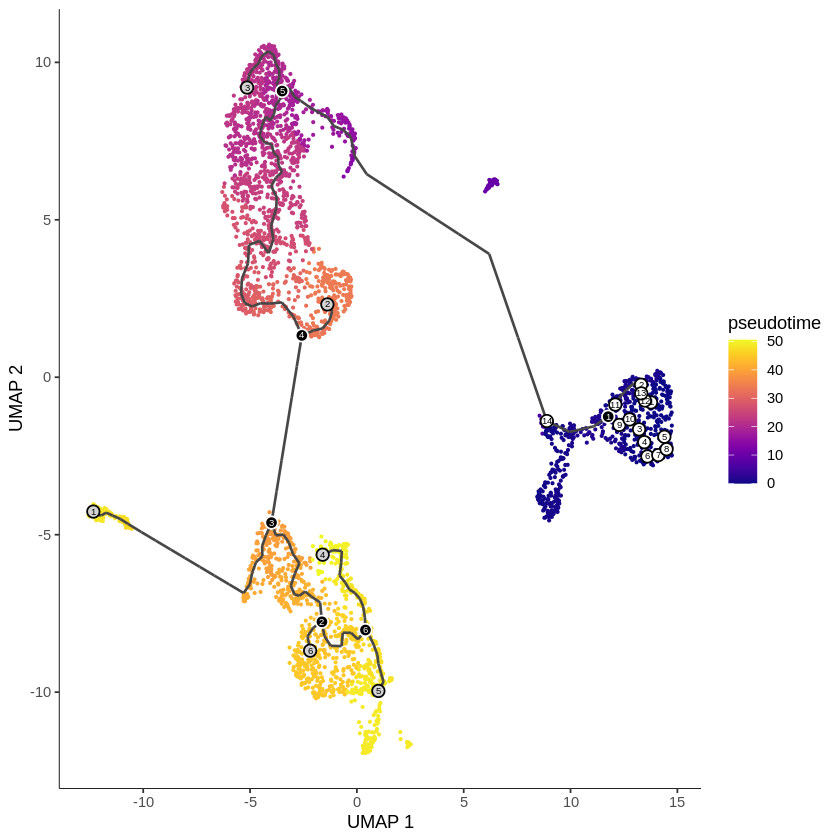

In [177]:
### Cells that co-express all 5 mesothelial markers (Upk3b, Upk1b, Wt1, Muc16, Msln) are identfied as lineage root cells

sc= pbmc@assays$RNA@scale.data
idx1 = which(as.numeric(sc["Upk1b", ]) > median(as.numeric(sc["Upk1b", ])))
idx2 = which(as.numeric(sc["Muc16", ]) > median(as.numeric(sc["Muc16", ])))
idx3 = which(as.numeric(sc["Wt1", ]) > median(as.numeric(sc["Wt1", ])))
idx4 = which(as.numeric(sc["Upk3b", ]) > median(as.numeric(sc["Upk3b", ])))
idx5 = which(as.numeric(sc["Msln", ]) > median(as.numeric(sc["Msln", ])))
int = intersect(idx1, intersect(idx2, intersect(idx3, intersect(idx5, idx4))))

#### Lineage evolution analysis using UMAP (monocle3 package)

cds <- as.cell_data_set(pbmc)
cds <- cluster_cells(cds = cds, reduction_method = "UMAP")
cds <- learn_graph(cds, use_partition = TRUE)

### we will use mesothelial cells as a starting point
cds <- order_cells(cds, reduction_method = "UMAP", root_cells = colnames(sc)[int], )
plot_cells(
  cds = cds,
  color_cells_by = "pseudotime",
  show_trajectory_graph = TRUE, cell_size = 0.7

)

In [179]:
### writing markers for each cluster to file
pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

write.csv(pbmc.markers, "~/pbmc_marker.csv", quote = F)


Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11



In [180]:
### intra and inter clustering for the heatmap
pbmc.markers = read.csv("~/pbmc_marker.csv", header= T, stringsAsFactors = F, check.names = F)

sc = pbmc@assays$RNA@scale.data
si$cluster = pbmc$seurat_clusters
####  300 markers from each cluster for intraclustering and 
#### iteratively adding each cluster with highest correlations with earlier cluster (for an ordered array) 
c = c()
uni = unique(pbmc.markers$cluster)
for(i in 1:length(uni)){
    c = append(c, which(pbmc.markers$cluster == uni[i])[1:300])}
sub = pbmc.markers[c, ]

ag = aggregate(t(sc[unique(sub$gene), ]), list(si$cluster), "median")
names = ag[,1]
print(names)
ag = ag[, -1]
rownames(ag) = names
c = c("2")
start = "2"
for(i in 2:nrow(ag)){
    temp = sort(cor(t(ag)))
    idd = which(rownames(ag) == start)
    temp2 = cor(t(ag), method = "spearman")[, idd]
    no = which(names(temp2) == "0")
    temp2 = temp2[-no]
    temp2 = tail(sort(temp2[setdiff(names(temp2), c)]), 1)
    c = append(c, names(temp2)[1])
    start = names(temp2)[1]
print(c)}
intra = c
intra = na.omit(intra)


### Hierarchical clustering is used for interclustering of the samples from the ordered array without mesothelial cells
### removing cluster 0 from the heatmap

c = c()
uni = unique(pbmc.markers$cluster)
for(i in 1:length(uni)){
    c = append(c, which(pbmc.markers$cluster == uni[i])[1:10])}
sub = pbmc.markers[c, ]

scc = sc[, setdiff(colnames(sc), meso)]
lt = c()
sii = si[colnames(scc), ]
for(i in 1:length(intra)){
idx = which(sii$cluster == intra[i])
r= hclust(dist(t(scc[, idx])))

lt = append(lt, idx[r$order])

}
lt = rownames(sii)[lt]

 [1] 0  1  2  3  4  5  6  7  8  9  10 11
Levels: 0 1 2 3 4 5 6 7 8 9 10 11
[1] "2" "6"
[1] "2"  "6"  "11"
[1] "2"  "6"  "11" "4" 
[1] "2"  "6"  "11" "4"  "3" 
[1] "2"  "6"  "11" "4"  "3"  "9" 
[1] "2"  "6"  "11" "4"  "3"  "9"  "8" 
[1] "2"  "6"  "11" "4"  "3"  "9"  "8"  "1" 
[1] "2"  "6"  "11" "4"  "3"  "9"  "8"  "1"  "10"
 [1] "2"  "6"  "11" "4"  "3"  "9"  "8"  "1"  "10" "7" 
 [1] "2"  "6"  "11" "4"  "3"  "9"  "8"  "1"  "10" "7"  "5" 
 [1] "2"  "6"  "11" "4"  "3"  "9"  "8"  "1"  "10" "7"  "5"  NA  


Warning message in rownames(mat):
“NaNs produced”


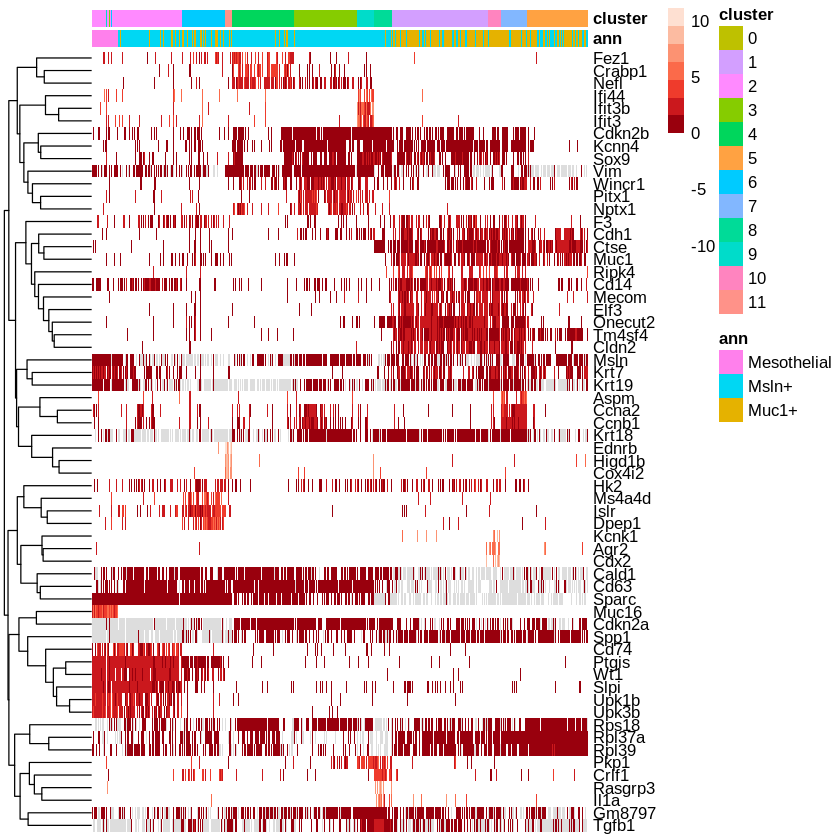

In [181]:
### additionally using a few preselected genes for heatmap representation

idd = read.csv("~/subset_genes.csv", header= T, stringsAsFactors =F)
idd = idd[,2]
 pheatmap(log2(sc[c(idd, "Sox9", "F3"), c(meso, lt)]+1), scale = "row", annotation_col = si , cluster_cols = F, show_colnames =  F, col =  c("white","white","white","white", "white","white", "white",rev(brewer.pal(8, "Reds")[2:8])))


In [183]:
#### We observe that scRNA data adequately captures the transition from mesothelial to mesenchymal type 

### To identify upregulated genes negatively correlated with the loss of mesothelial marker Upk3b
idx = which(scc["Upk3b", ] > summary(scc["Upk3b", ])[2])
c2 = c
c = c()
for(i in 1:nrow(scc)){
    c = append(c, cor.test(scc["Upk3b", idx], scc[i, idx], method = "spearman")$p.value)}
c2 = c()
for(i in 1:nrow(scc)){
    c2 = append(c2, cor(scc["Upk3b", idx], scc[i, idx], method = "spearman"))}

Warning message in cor(rank(x), rank(y)):
“the standard deviation is zero”
Warning message in cor.test.default(scc["Upk3b", idx], scc[i, idx], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(scc["Upk3b", idx], scc[i, idx], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(scc["Upk3b", idx], scc[i, idx], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(scc["Upk3b", idx], scc[i, idx], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(scc["Upk3b", idx], scc[i, idx], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(scc["Upk3b", idx], scc[i, idx], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(scc["Upk3b", idx], scc[i, idx], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning 

In [184]:
dt = cbind(rownames(sc)[which(c2 < -0.3)], c2[which(c2 < -0.3)], c[which(c2 < -0.3)])
dt[order(dt[,2]), ]
write.csv(cbind(rownames(sc)[which(c2 < -0.3)],c[which(c2 < -0.3)], c2[which(c2 < -0.3)]) , "test.csv", quote =F)

Shf,-0.300070895963163,6.83945224905796e-08
H13,-0.300345808845252,6.64470631308012e-08
Tspan12,-0.300462658109256,6.56356016995967e-08
Gsap,-0.301119966931982,6.12459315969463e-08
Acsl6,-0.301152868849417,6.10338128444745e-08
Hacd1,-0.30204042048717,5.55717854746898e-08
Ggct,-0.302459167737532,5.31614790332576e-08
Pfdn4,-0.302546598362074,5.26711097019335e-08
Syt13,-0.302825976390818,5.11332396463101e-08
Cd24a,-0.30289771879844,5.07453682698675e-08
Cd53,-0.302936706225303,5.05357766029513e-08


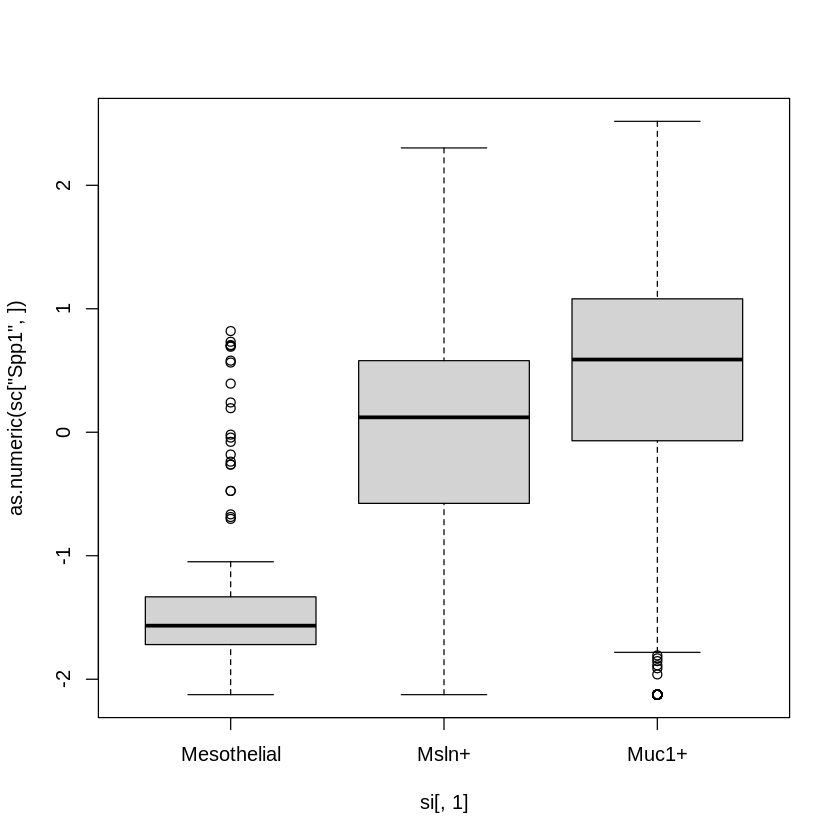

In [185]:
boxplot(as.numeric(sc["Spp1", ])~si[,1])